In [738]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [739]:
# dataset phat

DATA_PHAT = '../dataset/'
DATA_PATH_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

In [740]:
df_true = pd.read_csv(DATA_PHAT + DATA_PATH_TRUE, header=None)
df_noise1 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE1,header=None)
df_noise2 = pd.read_csv(DATA_PHAT + DATA_PATH_NOISE2,header=None)

In [741]:
df_true.head(5)

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39


In [742]:
df_noise1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39


In [743]:
df_noise2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38


### **Test Data 1**

In [744]:
#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = df_noise1[0]  #time
x = X.to_numpy()[:, np.newaxis]

Y = df_noise1.iloc[:,1:101]
y = Y.to_numpy()

#true is test
x_test = df_true[0].to_numpy()[:,np.newaxis]
y_test = df_true[1].to_numpy()[:, np.newaxis]

degrees = list(range(1,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        #predictions
        y_pred_all.append(model.predict(x_test))

        bias.append(abs(y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

Mean Bias:
[0.1046119  0.10361983 0.08780442 0.03847091 0.01668811 0.0102933
 0.00898785 0.00737389 0.00669004 0.01615585 0.01651086 0.01407579
 0.01633646 0.0263673  0.03827158 0.05005268 0.08763278 0.09121493
 0.09245241]

Mean Variance:
[0.00118132 0.00147208 0.00171471 0.00189878 0.00203802 0.00223529
 0.00238363 0.00254565 0.00394676 0.0026084  0.00242827 0.00238885
 0.00235898 0.00234475 0.00243909 0.00241474 0.00212611 0.00210574
 0.0020848 ]


<function matplotlib.pyplot.show(close=None, block=None)>

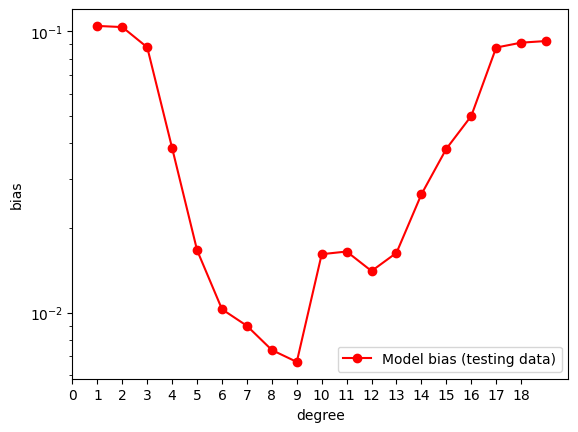

In [745]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

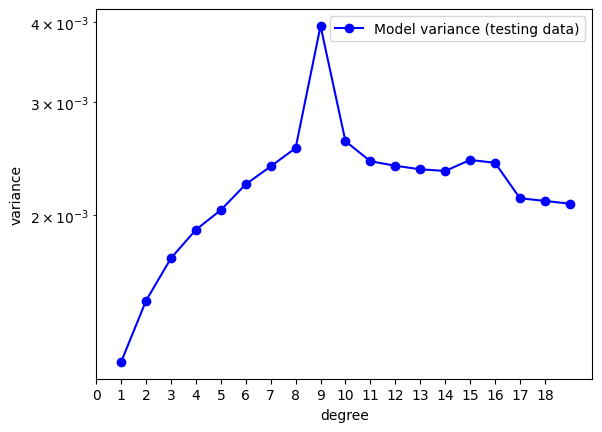

In [746]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [747]:
best_degree = degrees[np.argmin(mean_bias)]
best_degree

9

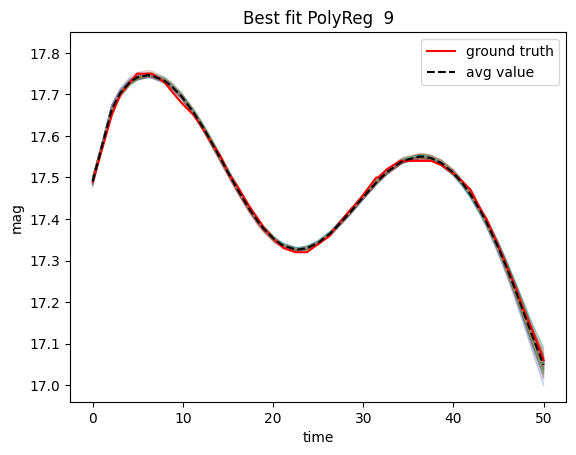

bias:  0.006690036291529672
variance 0.003946759748134829


In [748]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

y_pred_all = []
for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        #Testing
        y_pred_train = model.predict(x) 
        y_pred_test = model.predict(x_test)
        y_pred_all.append(y_pred_test)
        plt.plot(x_test,y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(x_test, y_test, 'r', label = 'ground truth')

plt.plot(x_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[best_degree - 1])
print('variance', mean_variance[best_degree - 1])

### **Test Data 2**

In [749]:
#DATA_PATH_NOISE3 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
X = df_noise2[0]  #time
x = X.to_numpy()[:, np.newaxis]

Y = df_noise2.iloc[:,1:101]
y = Y.to_numpy()

#true is test
x_test = df_true[0].to_numpy()[:,np.newaxis]
y_test = df_true[1].to_numpy()[:, np.newaxis]

degrees = list(range(1,20))

mean_bias = np.zeros(len(degrees))
mean_variance = np.zeros(len(degrees))

for j, degree in enumerate(degrees):
    bias = []
    y_pred_all = []

    for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        

        y_pred_all.append(model.predict(x_test))

        bias.append(abs(y_test - y_pred_all[i]))

    # bias
    pred_mean = np.mean(bias, axis=0)
    mean_bias[j] = np.mean(pred_mean)

    # variance
    pred_variance = np.std(y_pred_all, axis=0)
    mean_variance[j] = np.mean(pred_variance)

print("Mean Bias:")
print(mean_bias)
print()
print("Mean Variance:")
print(mean_variance)

Mean Bias:
[0.10436904 0.10607181 0.09187968 0.05050545 0.03643462 0.03758568
 0.04032173 0.04228031 0.04477442 0.0485861  0.04888251 0.04851896
 0.04930965 0.05563294 0.0704391  0.11455676 0.12518624 0.13329452
 0.14040393]

Mean Variance:
[0.02113256 0.02560118 0.03167672 0.03527781 0.0402986  0.04559276
 0.04941269 0.0526682  0.05583096 0.05445432 0.04969405 0.04968259
 0.05091983 0.05372675 0.05759329 0.04780424 0.0507615  0.05431813
 0.05835109]


<function matplotlib.pyplot.show(close=None, block=None)>

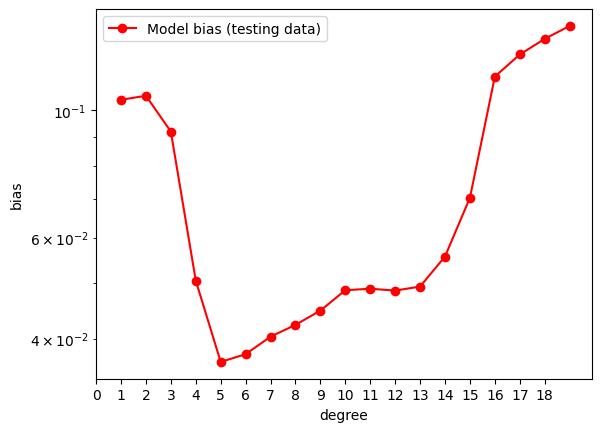

In [750]:
plt.xlabel('degree')
plt.ylabel('bias')
plt.plot(degrees, mean_bias,'-ro', label = 'Model bias (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

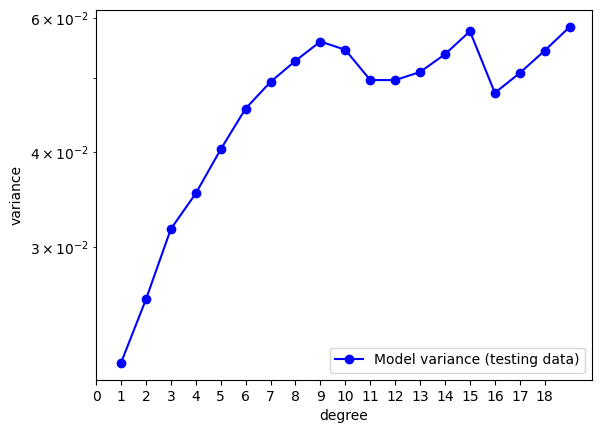

In [751]:
plt.xlabel('degree')
plt.ylabel('variance')
plt.plot(degrees, mean_variance,'-bo', label = 'Model variance (testing data)')
plt.legend(loc='best')
plt.yscale('log')
plt.xticks(range(0,len(degrees)))
plt.show

In [752]:
best_degree = degrees[np.argmin(mean_bias)]

best_degree

5

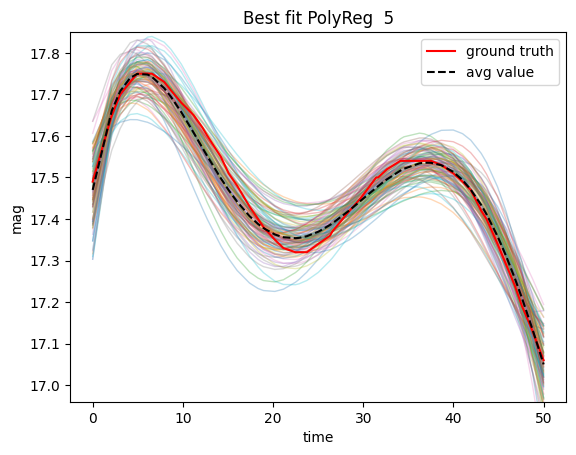

bias:  0.036434619162285936
variance 0.04029860246793506


In [753]:
plt.title( f'Best fit PolyReg  {best_degree}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

y_pred_all = []
for i in range(0, 100):
        y_i = y[:, i]
        y_i = y_i[:, np.newaxis]

        # create model
        model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
        # training 
        model.fit(x, y_i)
        
        #Testing
        y_pred_train = model.predict(x) 
        y_pred_test = model.predict(x_test)
        y_pred_all.append(y_pred_test)
        plt.plot(x_test,y_pred_test,linewidth = 1, alpha = 0.3)

pred_mean = np.mean(y_pred_all, axis=0)
pred_variance = np.std(y_pred_all, axis=0)



plt.plot(x_test, y_test, 'r', label = 'ground truth')

plt.plot(x_test, pred_mean, '--k', label = 'avg value')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

print('bias: ', mean_bias[best_degree - 1])
print('variance', mean_variance[best_degree - 1])